In [3]:
import pandas as pd
df_coffee=pd.read_feather("data/coffee_ratings_full.feather")
df_coffee

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,78.75,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,None,robustasa,None,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1334,78.08,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,None,robustasa,40,...,Blue-Green,0.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1336,75.08,Robusta,cafe politico,India,None,None,None,14-1118-2014-0087,cafe politico,None,...,Green,1.0,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [5]:
coffee_focus = df_coffee[["variety" , "country_of_origin" , "flavor"]]
coffee_focus = coffee_focus.reset_index()
coffee_focus

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


In [7]:
coffee_resamp=coffee_focus.sample(frac=1 , replace=True)
coffee_resamp

,index,variety,country_of_origin,flavor
181,181,Caturra,Colombia,7.75
1311,1311,None,India,7.75
1327,1327,None,Uganda,7.58
1118,1118,Typica,Taiwan,7.25
120,120,Caturra,Thailand,7.75
...,...,...,...,...
161,161,Caturra,Costa Rica,7.83
239,239,Other,Ethiopia,7.92
621,621,Caturra,Thailand,7.50
899,899,Other,"Tanzania, United Republic Of",7.42


In [9]:
coffee_focus["index"].value_counts()

index
0       1
898     1
896     1
895     1
894     1
       ..
445     1
444     1
443     1
442     1
1337    1
Name: count, Length: 1338, dtype: int64

In [11]:
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset = "index"))
num_unique_coffees

864

In [13]:
import numpy as np
mean_flavors_1000 = []

for i in range(1000):
    mean_flavors_1000.append(np.mean(coffee_focus.sample(frac=1 , replace=True)["flavor"]))

(array([  1.,  15.,  53., 143., 246., 270., 181.,  74.,  13.,   4.]),
 array([7.49372945, 7.49998057, 7.50623169, 7.51248281, 7.51873393,
        7.52498505, 7.53123617, 7.53748729, 7.54373842, 7.54998954,
        7.55624066]),
 <BarContainer object of 10 artists>)

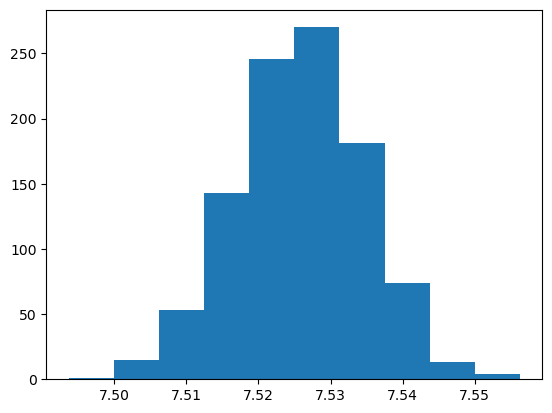

In [14]:
import matplotlib.pyplot as plt
plt.hist(mean_flavors_1000)

In [16]:
coffee_sample = df_coffee[["variety" , "country_of_origin" , "flavor"]].reset_index().sample(n=500)

In [19]:
#The bootstrap of mean coffee flavors
import numpy as np
mean_flavors_5000=[]

for i in range(5000):
    mean_flavors_5000.append(np.mean(coffee_sample.sample(frac=1 , replace=True)["flavor"]))

(array([1.000e+00, 6.300e+01, 3.050e+02, 8.090e+02, 1.386e+03, 1.321e+03,
        7.950e+02, 2.650e+02, 4.700e+01, 8.000e+00]),
 array([7.44054 , 7.452212, 7.463884, 7.475556, 7.487228, 7.4989  ,
        7.510572, 7.522244, 7.533916, 7.545588, 7.55726 ]),
 <BarContainer object of 10 artists>)

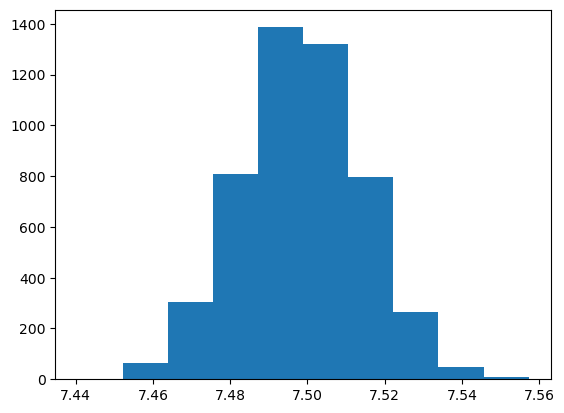

In [20]:
plt.hist(mean_flavors_5000)

In [21]:
coffee_sample["flavor"].mean()

7.498399999999999

In [22]:
np.mean(mean_flavors_5000)

7.4985446200000005

In [27]:
df_coffee["flavor"].mean()

7.526046337817639

In [29]:
coffee_sample["flavor"].std()

0.35461492282047846

In [31]:
#bootstrap'in standart hatasını bulmuş olduk
np.std(mean_flavors_5000 , ddof=1)

0.015664274696134226

In [33]:
#bootstrap örneklem standart sapması
np.std(mean_flavors_5000 , ddof=1)* np.sqrt(500)

0.3502638303878599

(array([1.000e+00, 6.300e+01, 3.050e+02, 8.090e+02, 1.386e+03, 1.321e+03,
        7.950e+02, 2.650e+02, 4.700e+01, 8.000e+00]),
 array([7.44054 , 7.452212, 7.463884, 7.475556, 7.487228, 7.4989  ,
        7.510572, 7.522244, 7.533916, 7.545588, 7.55726 ]),
 <BarContainer object of 10 artists>)

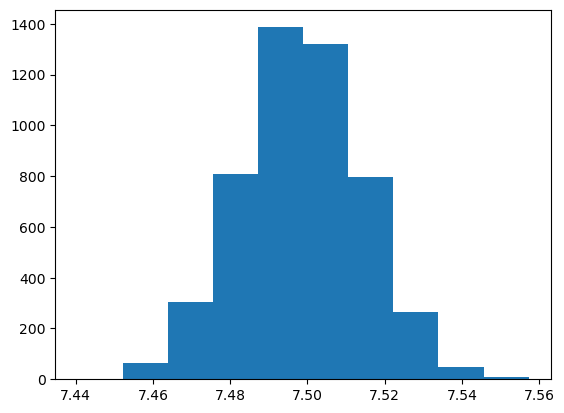

In [35]:
plt.hist(mean_flavors_5000)

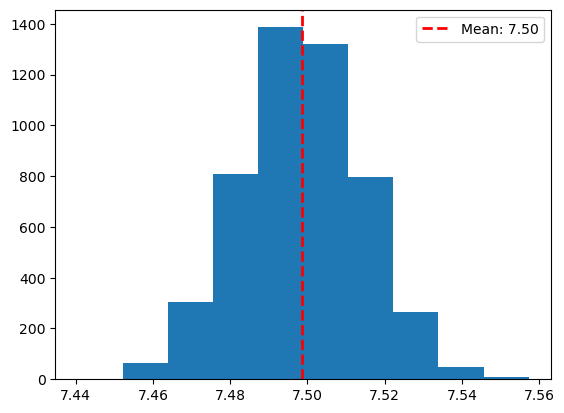

In [37]:
plt.hist(mean_flavors_5000)
plt.axvline(np.mean(mean_flavors_5000) , color="red" , linestyle="dashed" , 
            linewidth=2, label=f'Mean: {np.mean(mean_flavors_5000):.2f}')
plt.legend()

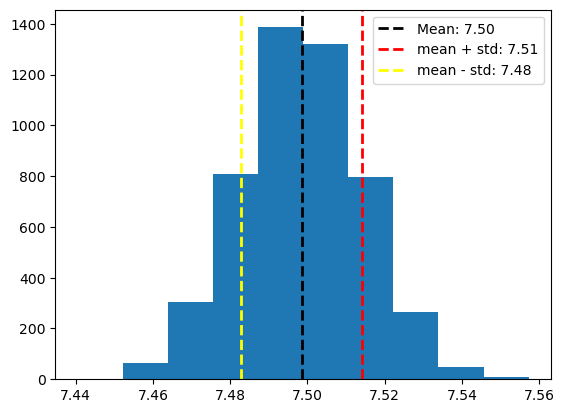

In [39]:
mean = np.mean(mean_flavors_5000)
plus_one_std = mean+ np.std(mean_flavors_5000 , ddof=1)
minus_one_std = mean - np.std(mean_flavors_5000 , ddof=1)

plt.hist(mean_flavors_5000);
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(plus_one_std, color="red" , linestyle="dashed", linewidth=2, label=f'mean + std: {plus_one_std:.2f}')
plt.axvline(minus_one_std, color="yellow" , linestyle="dashed", linewidth=2, label=f'mean - std: {minus_one_std:.2f}')
plt.legend()

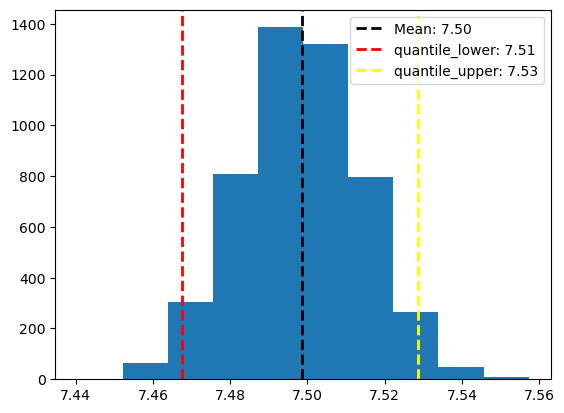

In [41]:
quantile_lower = np.quantile(mean_flavors_5000, 0.025)
quantile_upper = np.quantile(mean_flavors_5000 , 0.975)

plt.hist(mean_flavors_5000);
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(quantile_lower, color="red" , linestyle="dashed", linewidth=2, label=f'quantile_lower: {plus_one_std:.2f}')
plt.axvline(quantile_upper, color="yellow" , linestyle="dashed", linewidth=2, label=f'quantile_upper: {quantile_upper:.2f}')
plt.legend()

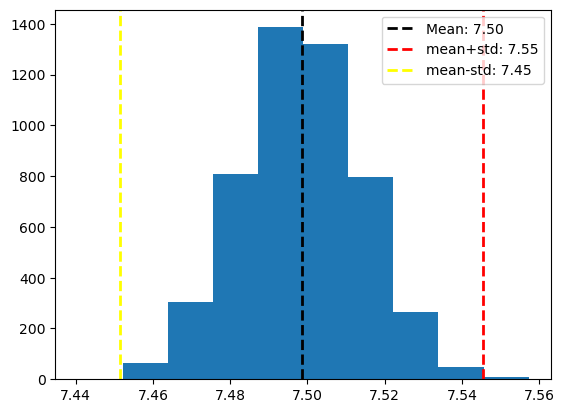

In [43]:
mean= np.mean(mean_flavors_5000)
plus_one_std = mean + 3*np.std(mean_flavors_5000 , ddof=1)
minus_one_std = mean- 3*np.std(mean_flavors_5000, ddof=1)

plt.hist(mean_flavors_5000);
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(plus_one_std, color="red" , linestyle="dashed", linewidth=2, label=f'mean+std: {plus_one_std:.2f}')
plt.axvline(minus_one_std, color="yellow" , linestyle="dashed", linewidth=2, label=f'mean-std: {minus_one_std:.2f}')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

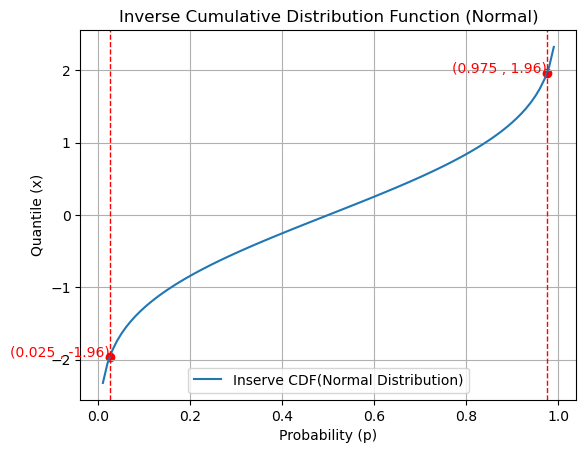

In [45]:
from scipy.stats import norm
p_values = np.linspace(0,1,100)
quantiles = norm.ppf(p_values , loc=0 , scale=1)
plt.plot(p_values , quantiles , label ="Inserve CDF(Normal Distribution)")

p1,p2 = 0.025 , 0.975
quantile_025 = norm.ppf(p1)
quantile_975 = norm.ppf(p2)

plt.scatter([p1 , p2] , [quantile_025 , quantile_975] , color="red") #noktaları çiz
plt.axvline(p1 , color="red" , linestyle="dashed" , linewidth=1) #p1 için dikey çizgi
plt.axvline(p2,color="red" , linestyle="dashed" , linewidth=1) #p2 için dikey çizgi

# X ve Y değerlerini grafite gösterelim
plt.text(p1, quantile_025 , f'({p1:.3f} , {quantile_025:.2f})' , color="red" , fontsize=10 , ha='right')
plt.text(p2, quantile_975 , f'({p2:.3f} , {quantile_975:.2f})' , color="red" , fontsize=10 , ha='right')

plt.xlabel("Probability (p)")
plt.ylabel("Quantile (x)")
plt.title("Inverse Cumulative Distribution Function (Normal)")
plt.grid(True)
plt.legend()
plt.show

In [46]:
df_stck = pd.read_feather("data/stack_overflow.feather")
df_stck

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,62812.0,I am a developer by profession,Yes,40.0,10.0,child,Yearly,145000.0,145000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Flask;jQuery,Angular;Angular.js;Flask;jQuery;React.js,Somewhat less welcome now than last year,50.0,30.0,20.0,At least 30
2257,62835.0,I am a developer by profession,Yes,23.0,9.0,child,Monthly,180000.0,33972.0,Russian Federation,...,Too short,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET Core;Flask,Just as welcome now as I felt last year,60.0,8.0,3.0,Under 30
2258,62837.0,I am a developer by profession,Yes,27.0,8.0,child,Monthly,7500.0,97284.0,Germany,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,42.0,12.0,2.0,Under 30
2259,62867.0,"I am not primarily a developer, but I write co...",Yes,33.0,13.0,child,Monthly,6000.0,72000.0,Panama,...,Too long,No,"Another engineering discipline (such as civil,...",None,Django;React.js,A lot less welcome now than last year,45.0,15.0,2.0,At least 30


In [47]:
from scipy.stats import norm

lower= norm.ppf(0.025 , loc=point_estimate , scale=std_error)
upper= norm.ppf(0.975 , loc=point_estimate , scale=std_error)
print(lower , upper)

NameError: name 'point_estimate' is not defined

In [ ]:
mean_comp_samp = df_stck["converted_comp"].mean()
mean_comp_samp

In [50]:
import numpy as np
so_boot_distn = []

for i in range(5000):
    so_boot_distn.append(np.mean(df_stck.sample(frac=1 , replace=True)["converted_comp"]))

(array([  3.,   2.,   4.,   4.,   4.,  14.,  29.,  37.,  42.,  48.,  74.,
         98., 117., 140., 167., 212., 225., 239., 248., 266., 292., 345.,
        277., 279., 276., 228., 237., 194., 176., 139., 106.,  97.,  89.,
         61.,  56.,  46.,  46.,  28.,  22.,   8.,   9.,   4.,   2.,   4.,
          3.,   1.,   1.,   0.,   0.,   1.]),
 array([101664.66386555, 102483.85171163, 103303.03955772, 104122.2274038 ,
        104941.41524989, 105760.60309598, 106579.79094206, 107398.97878815,
        108218.16663423, 109037.35448032, 109856.5423264 , 110675.73017249,
        111494.91801858, 112314.10586466, 113133.29371075, 113952.48155683,
        114771.66940292, 115590.857249  , 116410.04509509, 117229.23294118,
        118048.42078726, 118867.60863335, 119686.79647943, 120505.98432552,
        121325.17217161, 122144.36001769, 122963.54786378, 123782.73570986,
        124601.92355595, 125421.11140203, 126240.29924812, 127059.48709421,
        127878.67494029, 128697.86278638, 129517.0

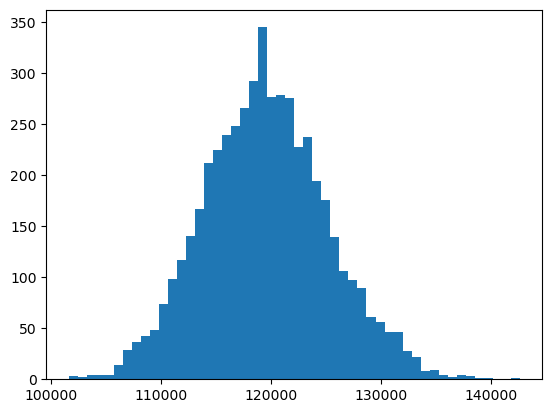

In [51]:
import matplotlib.pyplot as plt
plt.hist(so_boot_distn , bins=50)

In [52]:
std_error = np.std(so_boot_distn , ddof=1)
std_error

5612.854622086084

In [53]:
mean_comp_hyp=110000

In [54]:
z_score= (mean_comp_samp - mean_comp_hyp) / std_error
z_score

NameError: name 'mean_comp_samp' is not defined

In [ ]:
#z ortalaması 0 sapması 1 olan bir dağılımdır
from scipy.stats import norm
z_data = np.arange(-4,4,0.1)
plt.plot(z_data , norm.pdf(z_data , loc=0 , scale=1))

In [59]:
first_code_boot_dists= []

for i in range(5000):
    first_code_boot_dists.append(
    np.mean(
    (df_stck.sample(frac=1, replace=True)
    ["age_first_code_cut"] == "child").mean()))

# 9.HAFTA

## Calculating the z-score  
p-değerini hesaplamak için önce z-puanı hesaplanmalıdır.Örnek istatistiği, bu durumda çocukların programlamaya başlayan  
veri bilimcilerin oranı hesaplanır. Sıfır hipotezinden varsayılan değer yüzde 35 tir. Standart hata bootstrap dağılımının  
standart sapmasından alınır ve z-puanı grafikler arasındaki farkın standart hataya bölünmesidir.

Değişkenler keyfi birimlere ve aralıklara sahip olduğundan , hipotez test edilmeden önce değerlerin standartlaştırılması  
gerekir.Değerleri standartlaştırmanın yaygın bir yolu ortalamayı çıkarmak ve standart sapmaya bölmektir.Hipotez testi için,  
örnek istatistiğin alındığı , varsayılan parametre değerinin çıkarıldığı ve standart hataya bölündüğü bir varyasyon kullanılır.
Sonuç z-skoru olarak adlandırılır.  
Standardized value = (value-mean)/Standard Deviation  
z=(sample stat-pypoth.param.value)/ Standard Error

In [63]:
prop_child_samp = (df_stck["age_first_code_cut"] == "child").mean()
prop_child_samp

0.39141972578505085

In [64]:
prop_child_hyp = 0.55

In [65]:
std_err = np.std(first_code_boot_dists , ddof=1)
std_err

0.010324793986882656

In [66]:
z_score= (prop_child_samp - prop_child_hyp)/std_error
z_score

-2.8253052126265644e-05

Z-puanını, varsayılan sıfır ortalama ve bir standart sapma değerleriyle standart normal CDF'ye norm.cdf()'ye aktarılır.  
Sol kuyruk testi değil, sağ kuyruk testi gerçekleştirildiği için, p-değeri norm.cdf sonucu bir eksiltilerek hesaplanır.

In [69]:
from scipy.stats import norm
1-norm.cdf(z_score , loc=0 , scale=1)

0.500011271337042

# Statistical significance  
## p-value özeti  
* p-değerleri, sıfır hipotezi için ne kadar kanıt olduğunu ölçer.
* Büyük p-değerleri, alternatif hipotez için kanıt eksikliğini gösterir , bunun yerine  varsayılan sıfır hipotezine bağlı kalınır.
* Küçük p-değerleri alternatif hipotez lehine bu orjinal varsayımdan şüphe etmeye neden olur.
* Küçük bir p-değeri ile büyük bir p-değeri arasındaki kesme noktası(cutoff) ne belirler?  

## Significance level(Anlamlılık Düzeyi)
* Kesme noktası(cutoff) anlamlılık düzeyi olarak bilinir ve alfa(α) ile gösterilir.
* Uygun anlamlılık seviyesi veri setine ve çalışılan disipline bağlıdır.
* Yüzde beş en yaygın seçimdir, ancak yüzde on ve yüzde bir de popülerdir.
* Anlamlılık düzeyi hangi hipotezin destekleneceğine dair bir karar süreci sunar.
* Eğer p-değeri alfa değerinden küçük ya da eşitse , sıfır hipotezi reddedilir.Aksi takdirde, reddedilir.Eğer p<=α H0 reddedilir aksi taktirde H0 reddedilemez.

## p-value hesaplama  
* İş akışı, anlamlılık düzeyinin ayarlanmasıyla başlar, bu durumda 0,05.
* Ardından, örnek ortalaması hesaplanır ve varsayılan ortalama belirlenir.
* Z-skoru için, bootstrap dağılımından elde edilen standart hataya da ihtiyaç vardır.
* Daha sonra örnek ortalaması, varsayılan ortalama ve standart hata kullanarak z-skoru hesaplanır ve p-değerini elde etmek için standart normal CDF kullanılır.

In [77]:
from scipy.stats import norm
alpha=0.05
prop_child_samp = (df_stck["age_first_code_cut"] == "child").mean()
prop_child_hyp=0.35

std_err=np.std(first_code_boot_dists , ddof=1)
z_score = (prop_child_samp-prop_child_hyp)/ std_err

p_value =1- norm.cdf(z_score , loc=0 , scale=1)
p_value

3.01446331658628e-05

### Karar Verme  
Bu durumda önceki çıkan sonuç değeri 0.05'den küçüktür ve dolayısıyla sıfır hipotezi reddedilir.Programlamaya çocukken başlayan veri bilimcilerin oranının yüzde 35'ten fazla olduğuna dair alternatif hipotez için güçlü kanıtlar vardır.

In [80]:
p_value<=alpha

True

## Confidence intervals(Güven Aralıkları) 
Popülasyon parametresinin potansiyel değerleri hakkında bir fikir edinmek için anlamlılık düzeyinin bir eksiği(1-α) kadar bir güven aralığı düzeyi seçmek yaygındır.  
0.05 puanlık bir anlamlılık düzeyi için yüzde 95'lik bir güven aralığı kullanılır.  
Bu kantil yöntemi kullanılarak yapılan hesaplamaya bir örnektir.Bu aralık , çocukken programlama yapan veri bilimcilerin popülasyon oranı için bir dizi makul değer sağlar.

In [83]:
lower = np.quantile(first_code_boot_dists, 0.025)
upper = np.quantile(first_code_boot_dists, 0.975)
(lower, upper)


(0.3949579831932773, 0.3949579831932773)

### Hata Türleri  
defter

### Yapılan örnekteki olası hatalar  
Veri bilimcilerin çocuk olarak kodlama yapması durumunda , anlamlılık düzeyine eşit veya daha düşük bir p-değeri elde edildiyse ve sıfır hipotezi reddedildiyse, yanlış pozitif bir hata yapılmış olabilir.Veri bilimcilerin daha yüksek oranda çocuk olarak kodlamaya başlandığı düşünmesine rağmen , bu tüm popülasyon için doğru olmayabilir. Tersine , p-değeri anlamlılık düzeyinden büyükse ve sıfır hipotezi reddedilemediyse yanlış negatif bir hata yapılmış olabilir.

## t-testlerinin gerçekleştirilmesi tek bir değişken için bir test istatistiği olan z-skorunu hesaplamıştık.  
Bir önceki bölümde, tek bir değişken için bir test istatistiği olan z-skorunu hesaplama anlatılmıştı.

### İki örneklemli problemler  
* Burada bir değişkendeki gruplar arasında örnek istatistiklerinin karşılaştırılmasıyla ilgilenecektir.
* Stack Overflow veri setinde converted_comp sayısal bir yıllık ücret değişkenidir.
* age_first_code_cut ise iki seviyeli kategorik bir değişkendir, kullanıcının programlamaya ne zaman başladığını tamamlayan çocuk ve yetişkin yaş grubu arasındaki ücret farklılıkları hakkında sorular sorulabilir. Örneğin, ilk olarak çocukken programlama yapan kulanıcılar, yetişkin olarak başlayanlara göre daha mı iyi ücret alıyor?

### Grup bazında özet istatistiklerin hesaplanması  

In [89]:
#kullanılan veri seti bir örneklemdir
df_stck.groupby("age_first_code_cut")["converted_comp"].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

Burada çocuk programcıların ortalama tazminatı yaklaşık 132.000 dolar iken yetişkin programcılarınki 111.000 dolar civarındadır. Bu artış istatistiksel olarak anlamlı mıdır yoksa örnekleme değişkenliği ile açıklanabilir mi?

## Test İstatistikleri  
Poülasyon ortalamasını bilinmese de, örneklem ortalaması kullanılarak tahmin edilebilir. I bir örneklem ortalamasını belirtmek için kullanılır. Daha sonra örnek ortalamasının hangi gruba karşılık geldiğini belirtmek için alt simgeler kullanılır. Bu iki örneklem ortalaması arasındaki fark, hipotez testi için test istatistiğidir. Daha önce anlatılan z-skorları bir tür standartlaştırılmış test istatistiğidir.

defter

### Test istatistiğinin standartlaştırılması  
z-skorları, örneklem istatistiğinin alınması , bu istatistiğin ortalamasının ilgilenilen popülasyon parametresi olarak çıkarılması ve ardından standart hataya bölünmesiyle hesaplanır.İki örneklem durumunda , t olarak gösterilen test istatistiği benzer bir denklem kullanır. İki grup için örneklem istatistikleri arasındaki farkı alır , iki grup arasındaki popülasyon farkı çıkarılır ve ardından standart hataya bölünür.

### Standard Error  
Test istatistiği denkleminin paydası için gerekli olan standart hatayı hesaplamak için bootstrapping iyi bir seçenek olma eğilimindedir. Ancak, buna yaklaşmanın daha kolay bir yolu vardır. Örneklemdeki her grup için sayısal değişkenin standart sapması ve her gruptaki gözlem sayısı hesaplanır. Ardından bu değerler denkleme girilir ve sonuç hesaplanır.

### Sıfır hipotezinin doğru olduğunu varsayarsak  
Boş hipotezin doğru olduğu varsayılırsa, yapabilecek bir basitleştirme vardır. Sıfır hipotezi , popülasyon ortalamalarının eşit olduğunu ve aralarındaki farkın sıfır olduğunu varsayar, dolayısıyla paydaki popülasyon terimi kaybolur. Standart hata için yaklaşım eklendiğinde , artık yalnızca örnek veri kümesi üzerindeki hesaplamalar kullanılarak test istatistiği hesaplanabilir.

### Sıfır hipotezinin doğru olduğunu varsayan hesaplamalar

In [98]:
xbar = df_stck.groupby("age_first_code_cut")["converted_comp"].mean()
xbar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [100]:
s=df_stck.groupby("age_first_code_cut")["converted_comp"].std()
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [102]:
df_stck.groupby("age_first_code_cut")["converted_comp"].agg(["mean" , "std" ,"count"])

,mean,std,count
age_first_code_cut,,,
adult,111313.311047,271546.521729,1376
child,132419.570621,255585.240115,885


#### Test İstatistiğinin Hesaplanması

In [105]:
import numpy as np

pay = xbar.iloc[1] - xbar.iloc[0]
payda = np.sqrt(s.iloc[1]*2 / n.iloc[1] + s.iloc[0]*2 / n.iloc[0])
t_stat = pay /payda
t_stat

NameError: name 'n' is not defined

### t-istatistiklerinden p-değerlerinin hesaplanması
### t-dağılımları  
Test istatistiği, t, bir t-dağılımını takip eder. t-dağılımlarının serbestlik derecesi veya kısaca df olarak adlandırılan bir parametresi vardır. Burada bir serbestlik derecesi t-dağılımıının PDF'sini sarı renkle ve normal dağılımın PDF'sini mavi çizgilerle gösteren bir çizgi grafiği yer almaktadır. Küçük serbestlik dereceleri için t-dağılımının normal dağılıma göre daha kalın kuyruklara sahip olduğuna dikkat edilmedilir , ancak bunun dışında benzer görünüyorlar.

Text(0, 0.5, 'PDF(x)')

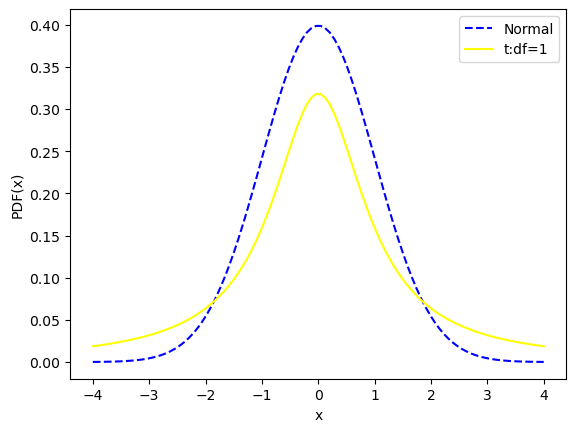

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x), label='Normal', linestyle='--', color='blue')
plt.plot(x, stats.t.pdf(x, 1), label='t:df=1', color='yellow')
plt.legend()
plt.xlabel('x')
plt.ylabel('PDF(x)')

### Degrees of freedom  
Serbestlik derecesini arttırdıkça , t-dağılımı normal dağılıma yaklaşır. Aslında normal dağılım, sonsuz serbestlik derecesine sahip bir t-dağılımıdır. Serbestlik derecesi, veri örneğindeki mantıksal olarak bağımsız değerlerin maksimum sayısı olarak tanımlanır. Bu oldukça zor bir kavramdır, bu yüzden bir örnek deneyelim.

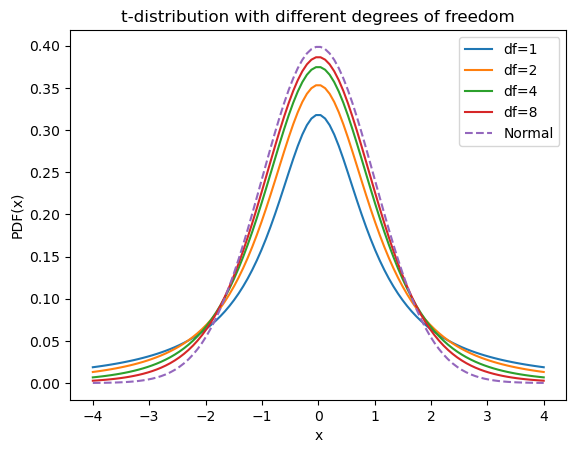

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 100)

# Plot for different degrees of freedom
for df in [1, 2, 4, 8]:
    plt.plot(x, stats.t.pdf(x, df), label=f'df={df}')

plt.plot(x, stats.norm.pdf(x), label='Normal', 
         linestyle='--')
plt.legend()
plt.title('t-distribution with different degrees of freedom')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.show()

### Serbestlik derecelerinin hesaplanması  
Veri kümemizde 5 bağımsız gözlem olduğunu ve değerlerden dördünün 2,6,8 ve 5 olduğunu varsayalım. Bu bilgiyle, beşinci değer artık bağımsız değildir ; 4 olmalıdır. Örneklemdeki beş gözlemin hepsi bağımsız olsa da , örneklem hakkında ek bir gerçeği bildiğimiz için -ortalaması 5 olduğu için- sadece 4 serbestlik derecesine sahibiz. İki örneklemli durumumuzda , gözlem sayısı kadar serbestlik derecesi vardır, eksi iki çünkü iki örneklem istatistiğini , her grubun ortalamasını biliyoruz.  
df= nchild + nadult-2

### Hipotezler  
H0: Ortalama maaş(ABD doları cinsinden) ilk olarak çocuk olarak kodlayanlar ve ilk olarak yetişkin olarak kodlayanlar için aynıdır.  
Ha: ortalama maaş(ABD doları cinsinden) önce çocuk olarak kodlayanlar için önce yetişkin olarak kodlayanlara kıyasla daha yüksektir.  
Bu bir "daha büyük" alternatif hipotezi olduğundan, sağ kuyruklu bir teste ihtiyaç vardır.

### Significance Level  
Şimdi bir p-değeri hesaplayacağız, ancak önce bir anlamlılık düzeyine karar vermemiz gerekiyor. Birkaç olasılık var; 0.1'i kullanalım. Bu p-değerinin 0.1'den küçük veya ona eşit olması durumunda alternatif lehine boş hipotezi reddedeceğimiz anlamına gelir.

### P-değerlerinin hesaplanması: bir orana karşı bir değer  
Daha önce, p-değerini elde etmek için z-skoru normal CDF ile dönüştürüldü. Sağ kuyruklu bir test olduğu için sonucu birden çıkardık. Yine daha önce örneklem bilgisini kullanarak test istatistiği standart hatası için bir yaklaşım kullanıldı. Bu yaklaşımı kullanmak daha fazla belirsizlik ekler ve bu yüzden bu bir z problemi yerine bir t problemidir. t dağılımı , tek bir istatistik hesaplamasında birden fazla tahmin kullanıldığında daha fazla belirsizliğe izin verir. Burada çoklu tahminler örnek ortalamasına ve örnek standart sapmasına karşılık gelmektedir.

In [117]:
from scipy.stats import norm
1-norm.cdf(z_score)

3.01446331658628e-05

z-statistic : Bir popülasyon parametresini tahmin etmek için bir örnek istatistiği kullanırken gereklidir.  
t-statistic : Bir popülasyon parametresini tahmin etmek için çoklu örneklem istatistiği kullanırken gereklidir.

#### P-değerlerinin hesaplanması farklı gruplardan iki ortalama

In [121]:
degrees_of_freedom = n.iloc[0] + n.iloc[1]-2
degrees_of_freedom

NameError: name 'n' is not defined

P-değerini hesaplamak için , test istatistiğini normal dağılım CDF'si yerine t-dağılım CDF'sini kullanarak dönüştürmemiz gerekir. Norm-dot-cdf yerine t-dot-cdf kullanıldığına ve df argümanının serbestlik derecesine ayarlandığına dikkat edin. Bu p-değeri , nokta-bir anlamlılık düzeyinden küçüktür , bu nedenle çocukken kodlamaya başlayan Stack Overflow veri bilimcilerinin daha fazla kazandığı alternatif hipotezi lehine boş hipotezi reddetmeliyiz.

In [124]:
from scipy.stats import t
1-t.cdf(t_stat , df=degrees_of_freedom)

NameError: name 't_stat' is not defined

# Paired t-tests  
Daha önce iki grup arasındaki ortalamaların farkına ilişkin standartlaştırılmış bir test istatistiğinden bir p-değeri hesaplamak için t-dağılımı kullanılmıştı.

### US Republican presidents dataset  
ABD başkanlık seçimlerinin bir veri kümesidir. Her satır ilçe düzeyinde bir başkanlık seçimini temsil etmektedir. Veri setindeki değişkenler ABD eyaleti , bu eyalet içindeki ilçe ve 2008 ve 2012' de Cumhuriyetçi adaya verilen oy yüzdesidir.

In [128]:
import pandas as pd
df_election =pd.read_feather("data/repub_votes_potus_08_12.feather")
df_election

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757
...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478
96,Wisconsin,La Crosse,37.490904,40.577038
97,Wisconsin,Lafayette,38.104967,41.675050
98,Wyoming,Weston,76.684241,83.983328


### Hipotezler  
Sorulardan biri, Cumhuriyetçi adaya verilen oyların yüzdesinin 2008'de 2012'ye kıyasla daha düşük olup olmadığıdır. Buu test etmek için hipotezler oluşturulur. Daha önce olduğu gibi, boş hipotez önsezinin yanlış olduğu ve nüfus parametrelerinin her yıl grubunda aynı olduğudur. Alternatif hipotez ise 2008'deki parametrenin 2012'dekinden daha düşük olduğudur. Anlamlılık düzeyi 0.05'dir. Bu veri setinin bir özelliği , 2008 ve 2012 oylarının eşleştirilmiş olmasıdır , yani her ikiside aynı ilçeye atıfta bulunduğu için bağımsız değildirler. Bu, oy verme modellerinin ilçe düzeyindeki demografik özellikler ve yerel politikalar nedeniyle oluşabileceği anlamına gelir ve modelide bu eşleştirme yakalanmak istenmektedir.  
H0 =  μ2008-2012 =0  
Ha =  μ2008-2012 <0  
### İki örnekten bir örneğe  
Eşleştirilmiş analizler için, iki değişkeni ayrı ayrı ele almak yerine , farkın tek bir değişkeni ele alınabilir. Bu , diff adlı bir DataFrame' de saklanır. Farkın bu histogramında , çoğu değer eksi on ile on arasındadır ve en az bir aykırı değer vardır.

In [131]:
sample_data = df_election.copy()
sample_data["diff"] = sample_data["repub_percent_08"] - sample_data["repub_percent_12"]
sample_data

,state,county,repub_percent_08,repub_percent_12,diff
0,Alabama,Hale,38.957877,37.139882,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
2,California,Lake,38.896719,39.331367,-0.434648
3,California,Ventura,42.923190,45.250693,-2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812
...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087


(array([ 1.,  1.,  3., 12., 29., 28., 21.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-16.73039829, -14.08019672, -11.42999514,  -8.77979356,
         -6.12959198,  -3.4793904 ,  -0.82918882,   1.82101276,
          4.47121434,   7.12141592,   9.7716175 ,  12.42181908,
         15.07202066,  17.72222224,  20.37242382,  23.0226254 ,
         25.67282698,  28.32302856,  30.97323013,  33.62343171,
         36.27363329]),
 <BarContainer object of 20 artists>)

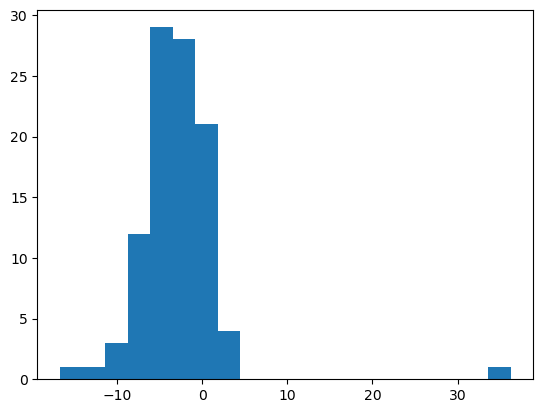

In [133]:
import matplotlib.pyplot as plt
plt.hist(sample_data["diff"] , bins=20)

In [135]:
#farkın örnek istatiklerini hesaplayalım 
x_bar_diff =sample_data["diff"].mean()
x_bar_diff

-2.877109041242944

### Revize Edilmiş Hipotezler  
Hipotezler tek popülasyon ortalamasının , μdiff'in sıfıra eşit veya sıfırdan küçük olması açısından yeniden ifade edilebilir. Test istatistiği, t, iki örneklemli duruma kıyasla biraz daha basit bir denkleme sahiptir. Tek bir istatistik vardır, bu nedenle serbestlik derecesi sayısı çift sayısı eksi birdir.  
H0 : μdiff=0  
Ha : μdiff<0  
df= ndiff-1

### p-değerlerinin hesaplanması

In [139]:
import numpy as np
n_diff =len(sample_data)
s_diff =sample_data["diff"].std()
t_stat = (x_bar_diff - 0) / np.sqrt(s_diff**2 / n_diff)

In [141]:
t_stat

-5.601043121928489

In [143]:
from scipy.stats import t
degrees_of_freedom = n_diff - 1
p_value = t.cdf(t_stat , df=degrees_of_freedom)
p_value

9.572537285272411e-08

### ttest() kullanarak iki ortalama arasındaki farkları test etme  
Pingouin paketi, hipotez testi için çeşitli farklı yöntemler sağlar ve sonuçları pandas DataFrame olarak döndürür. Çıktısı scipy-dot-stats'ın benzer yöntemlerine göre çalışmak için biraz daha dostça olabilir. Pingouin'den bir yöntem ttest'tir ve dizi benzeri nesnelerle çalışır, bu nedenle ilk argüman Farklar Serisidir. Bunun gibi dönüştürülmüş bir tek örnek testi için y , sıfır olan boş hipotezden varsayılan fark değerini belirtir. Alternatif hipotez türü, sırasıyla iki kuyruklu , sol kuyruklu ve sağ kuyruklu testlere karşılık gelen iki taraflı ,daha az veya daha büyük olarak belirtilebilir.Çıktısı. Test istatistiğinin değerinini , serbestlik derecesini , alternatif yönü ve p-değerini tanıyabiliriz. Ek çıktı, bu dersin kapsamı dışında kalan daha gelişmiş istatistiksel kavramları ifade eder.

In [146]:
import pingouin
pingouin.ttest(sample_data["diff"] , y=0 , alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


### paired=True ile ttest()

Eşleştirilmiş veriler için ttestinin daha da az çalışma gerektiren bir varyasyonu vardır. İki eşleştirilmiş değişken arasındaki farkı hesaplamak yerine, her ikisi de doğrudan ttestine x ve y olarak geçirebilir ve paired değerini True olarak ayarlayabiliriz. İlk 4 sütundaki sonuçların öncekiyle aynı olduğuna dikkat edin.

In [150]:
pingouin.ttest(x=sample_data['repub_percent_08'], 
               y=sample_data['repub_percent_12'], paired=True, 
               alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


### Unpaired ttest()  
Eşleştirilmiş seçeneğini Doğru olarak ayarlamazsak ve bunun yerine eşleştirilmemiş bir t-testi yaparsak , sayılar değişir. Test istatistiği sıfıra daha yakındır , daha fazla serbestlik derecesi vardır ve p-değeri çok daha büyüktür. Verilerimiz eşleştirilmişken eşleştirilmemiş bir t-testi yapmak yanlış negatif hata olasılığını arttırır.

In [153]:
pingouin.ttest(x=sample_data['repub_percent_08'], 
               y=sample_data['repub_percent_12'], 
               paired=False, alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


# 10.HAFTA

## ANOVA test

In [157]:
#iş memnuniyeti 5 kategori
import pandas as pd
df_stck =pd.read_feather("data/stack_overflow.feather")
df_stck["job_sat"].value_counts()
# Stack Overflow anketi "Çok memnunumdan hiç memnun değilim'e " kadar 5 kategoriden oluşan bir iş memnuniyeti değişkeni içerir.

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

### Çoklu Dağılımları Görselleştirme  
Ortalama yıllık ücretin her bir iş tatmini seviyesi için farklı olup olmadığının bilinmek istendiği varsayılsın. Yapılacak ilk şey dağılımları kutu grafikleri ile görselleştirmektir. Seaborn'un boxplot yöntemi burada stack_overflow verilerini kullanarak yatay eksende converted_comp ve dikey eksende job_sat ile güzel bir seçenek sunmaktır. "Çok memnun" diğerlerinden biraz daha yüksek görünüyor, ancak önemli ölçüde farklı olup olmadıklarını görmek için hipotez testleri kullanmak gerekmektedir.

<Axes: xlabel='converted_comp', ylabel='job_sat'>

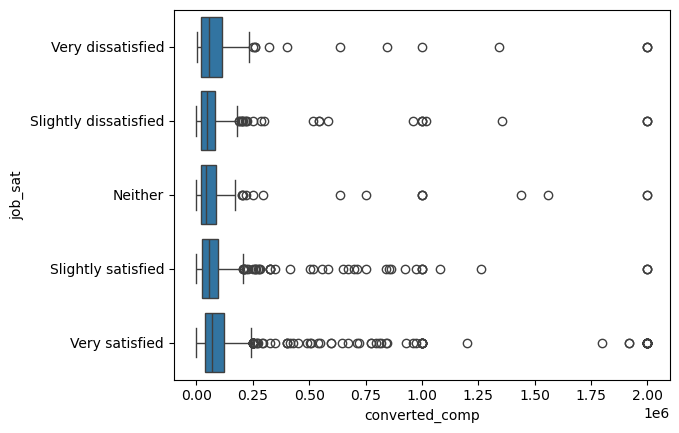

In [160]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.boxplot(x="converted_comp" , y="job_sat" , data=df_stck)

### Analysis of variance(ANOVA)  
ANOVA testleri gruplar arasında farklılık olup olmadığını belirler. Anlamlılık düzeyi 0.2 olarak belirlendi. Bu değer birçok durumda olduğundan daha büyüktür, ancak daha sonra farklı sayıdaki grupları karşılaştırmanın sonuçlarını anlamaya yardımcı olacaktır. Birden fazla gruptaki değerleri karşılaştırmak için pingouin anova yöntemi kullanılacak. Verileri stack_overflow , bağımlı değişken olan dv'yi converted_comp ve aralarında hesaplama yapılacak grup sütunu job_sat olarak belirlenir. p-değeri , p-unc sütununda saklanır, bu sütun , alfa değerinden yüzde 20 daha küçük olan 0.0013 noktasıdır. Bu, iş tatmini kategorilerinden en az ikisinin ücret düzeyleri arasında önemli farklılıklar olduğu anlamına gelir, ancak bu bize hangi iki kategori olduğunu söylemez.

In [163]:
import pingouin
pingouin.anova(data=df_stck , dv = "converted_comp" , between = "job_sat") #

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


## Pairwise tests  
Hangi kategorilerin farklı olduğunu belirlemek için, beş iş memnuniyeti kategorisinin tamamını karşılaştırarak her bir çift sırayla test edilmelidir. Beş maddelik bir setten iki madde seçmenin on yolu vardır, dolayısıyla gerçekleştirilmesi gereken on test vardır. Anlamlılık düzeyi 0.2'dir.

In [166]:
import pingouin
pingouin.pairwise_tests(data=df_stck , dv="converted_comp" , between = "job_sat" , padjust="none")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931


### Bonferroni correction  
Bunun çözümü, p-değerlerini arttırmak için bir ayarlama uygulamak ve yanlış pozitif alma şansını azaltmaktır. Yaygın bir ayarlama Bonferroni düzeltmesidir. Düzeltilmemiş p-unc sütununun aksine, düzeltilmiş p-değerlerine karşılık gelen p-corr sütununa bakıldığında, çiftlerden yalnızca ikisinin önemli farklılıklara sahip olduğu görülmektedir.

In [169]:
pingouin.pairwise_tests(data=df_stck , dv="converted_comp" , between = "job_sat" , padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


### One-sample proportion tests  
Hipotez testleri, bilinmeyen bir popülasyon oranının belli bir değere eşit olup olmadığını ölçtüğü anlatılmıştı. Örneklem istatistiğinin standart hatasını tahmin etmek için örneklem üzerinde bootstraping kullanılmıştı. Standart hata daha sonra standartlaştırılmış bir test istatistiği olan z-skorunu hesaplamak için kullanıldı , bu da bir p-değeri elde etmek için kullanıldı , böylece boş hipotezin reddedilip reddedilmeyeceğine karar verilebildi. Bir bootstrap dağılımını hesaplamak hesaplama açısından yoğun olabilir, bu nedenle bu sefer test istatistiğini hesaplamak yerine bootstrap olmadan hesaplama yapılacaktır.(1)

### Stack Overflow age categories  
Stackoverflow veri setindeki popülasyondaki kullanıcıların yarısının otuz yaşın altında olduğunu varsayalım ve bir fark olup olmadığını kontrol edelim. Anlamlılık düzeyini 0.01 olarak belirleyelim. Örneklemde , kullanıcıların yarısından biraz fazlası otuz yaşın altındadır.  
H0 = 0.5  
Ha != 0.5

In [173]:
alpha = 0.01
df_stck["age_cat"].value_counts()

age_cat
Under 30       1211
At least 30    1050
Name: count, dtype: int64

In [175]:
alpha = 0.01
df_stck["age_cat"].value_counts(normalize=True)

age_cat
Under 30       0.535604
At least 30    0.464396
Name: proportion, dtype: float64

In [177]:
# z için değişkenler
p_hat = (df_stck["age_cat"] == "Under 30").mean()
p_hat

0.5356037151702786

In [179]:
p_0 = 0.5

In [181]:
n = len(df_stck)

In [183]:
import numpy as np
pay= p_hat - p_0
payda= np.sqrt(p_0 * (1-p_0)/n)
z_score = pay/payda
z_score

3.385911440783663

### Calculating the p-value  
Sol kuyruklu alternatif hipotezler için norm.cdf kullanarak z-skoru p-değerine dönüştürülür. Sağ kuyruklu alternatif hipotezler için norm.cdf sonucu birden çıkarılır. İki kuyruklu alternatif hipotezler için, test istatistiğinin her iki kuyrukta da yer alıp almadığı kontrol edilir, dolayısıyla p-değeri bu iki değerin toplamıdır: biri z-skoruna, diğeri de dağılımın diğer tarafındaki negatifine karşılık gelir. Normal dağılım PDF'si simetrik olduğundan, z-skoru pozitif olduğu için bu , sağ kuyruklu p-değerinin iki katı olarak basitleştirilir. Burada , p-değeri sıfır-bir noktasının anlamlılık düzeyinden küçüktür, bu nedenle sıfır hipotezini reddererek otuz yaşın altındaki kullanıcıların oranının beş noktasına eşit olmadığı sonucuna varılır.

In [186]:
from scipy.stats import norm
#sol kuyruk
p_value = norm.cdf(z_score)
p_value

0.999645288631595

In [188]:
#sağ kuyruk
p_value = 1- norm.cdf(z_score)
p_value

0.00035471136840503625

In [190]:
#iki kuyruk: z-skorunun hem sol hem de sağ kuyruklarındaki olasılığı toplar. Bu, z-skorunun her iki uçta da nasıl davranacağını kontrol eder.
p_value= norm.cdf(-z_score) + 1-norm.cdf(z_score)
p_value

0.0007094227368100725

In [192]:
p_value = 2* (1-norm.cdf(z_score))
p_value

0.0007094227368100725

In [194]:
p_value<alpha

True

# Two-sample proportion test  
ortalamalarda oldugu gibi iki popülasyondaki oranlar arasındaki farklar da test edilebilir.

### Comparing two proportions  
Stack Overflow anketi bir hobbyist değişkeni içermektedir. "Evet" değeri kullanıcının kendisini hobici olarak tanımladığı, "Hayır" değeri ise kendisini profesyonel olarak tanımladığı anlamına gelmektedir. Hobi sahibi kullanıcıların oranının otuz yaş altı kategorisi ile otuz yaş ve üstü kategorisi için aynı olduğu varsayılabilir, bu da iki kuyruklu bir testtir. Daha açık bir ifadeyle , boş hipotez her bir grup için popülasyon parametreleri arasındaki farkın sıfır olduğudur. Anlamlılık düzeyini 0.05 olarak belirleyelim.  
H0 : p>=30 - p<30 =0  
Ha : ? p>=30- p<30=! 0

In [198]:
alpha= 0.05

In [200]:
p_hat = df_stck.groupby("age_cat")["hobbyist"].value_counts(normalize=True)
p_hat

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: proportion, dtype: float64

In [202]:
n = df_stck.groupby("age_cat")["hobbyist"].count()
n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [204]:
p_hat_at_least_30 = p_hat[('At least 30', 'Yes')]
p_hat_at_under_30 = p_hat[('Under 30', 'Yes')]

(p_hat_at_least_30, p_hat_at_under_30)

(0.7733333333333333, 0.8431048720066061)

In [206]:
n_at_least_30 = n['At least 30']
n_at_under_30 = n['Under 30']
(n_at_least_30, n_at_under_30)

(1050, 1211)

In [208]:
import numpy as np
p_hat = (n_at_least_30 * p_hat_at_least_30 + n_at_under_30 * p_hat_at_under_30) / (n_at_least_30 + n_at_under_30)

std_error = np.sqrt(p_hat * (1 - p_hat) / n_at_least_30 +
                    p_hat * (1 - p_hat) / n_at_under_30)

z_score = (p_hat_at_least_30 - p_hat_at_under_30) / std_error

z_score

-4.223691463320559

In [210]:
n_hobbyist = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])

from statsmodels.stats.proportion import proportions_ztest

z_score, p_value = proportions_ztest(count=n_hobbyist, nobs=n_rows, 
                                     alternative='two-sided')

(z_score, p_value)

# h0 red 

(-4.223691463320559, 2.403330142685068e-05)

### Job satisfaction and age category  
Başka bir örnek deneyelim. Stack Overflow örnekleminin iki kategorili bir yaş kategorisi değişkenine ve beş kategorili bir iş memnuniyeti değişkenine sahip olduğunu hatırlayın.

In [213]:
df_stck["age_cat"].value_counts()

age_cat
Under 30       1211
At least 30    1050
Name: count, dtype: int64

In [215]:
df_stck["job_sat"].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

### Hipotezlerin Beyan Edilmesi  
Bu değişkenlerin bağımsızlığını test etmek için hipotezler beyan edebiliriz. Burada yaş kategorisi yanıt değişkeni, iş tatmini ise açıklayıcı değişkendir: Boş hipotez, bağımsızlığın gerçekleştiğidir. 0.1'lik anlamlılık düzeyi kullanalım.Test istatistiği ki-kare(χ²) olarak gösterilir. Bağımsızlığın doğru olması durumunda gözlenen sonuçların beklenen değerlerden ne kadar uzak olduğunu ölçer.  
H0 : Yaş kategorileri iş tatmini düzeylerinden bağımsızdır.  
Ha : Yaş kategorileri iş tatmini düzeylerinden bağımsız değildir.

### Exploratory visualization : proportional stacked bar plot( Keşifsel görselleştirme : orantılı yığılmış çubuk grafiği)  
Orantılı yığılmış çubuk grafiği kullanarak verileri inceleyelim. Her yaş grubundaki oranlar hesaplanarak başlanır. Ardından , bu tabloyu geniş biçime dönüştürmek için unstack yöntemi kullanılır. Çizim yöntemini kullanıp kind bar ve stacked True olarak ayarlandığında orantılı yığınlanmış bir çubuk çizimi elde edilir.

In [219]:
props = df_stck.groupby('job_sat')['age_cat'].value_counts(normalize=True)
props

C:\Users\nuray\AppData\Local\Temp\ipykernel_11012\384739958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  props = df_stck.groupby('job_sat')['age_cat'].value_counts(normalize=True)


job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: proportion, dtype: float64

In [221]:
wide_props = props.unstack()
wide_props

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,0.490566,0.509434
Slightly dissatisfied,0.467836,0.532164
Neither,0.432836,0.567164
Slightly satisfied,0.435294,0.564706
Very satisfied,0.488055,0.511945


<Axes: xlabel='job_sat'>

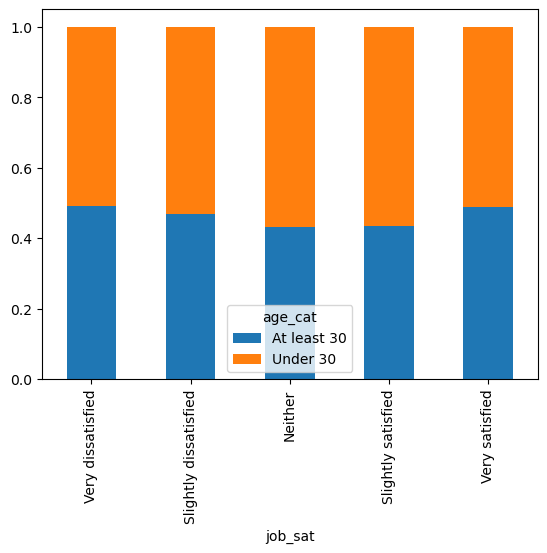

In [223]:
wide_props.plot(kind='bar', stacked=True)

In [225]:
expected, observed, stats = pingouin.chi2_independence(data=df_stck, x='job_sat', 
                                                       y='age_cat')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


Yine pingouin'den ki-kare bağımsızlık testini kullanalım. Veri olarak stack_overflow, x ve y olarak da job_sat ve age_cat değerlerine sahibiz. Serbestlik derecemiz dört olduğu için burada bir düzeltme yapmıyoruz, değişken kategorilerinin her birinden bir çıkarıp çarparak hesaplıyoruz. P-değeri belirlediğimiz anlamlılık düzeyinin üzerinde olan 0.23'tür , bu nedenle yaş kategorilerinin iş memnuniyetinden bağımsız olduğu sonucuna varıyoruz.

### Degress of freedom:  
(No, of response categories-1) x (no , of explanatory categories-1)  
(2-1) * (5-1) =4

### Değişkenleri değiştirilirse?  
Değişkenler yer değiştirdiğinde yaş kategorisi yanıt , iş tatmini ise açıklayıcı değişken olur

<Axes: xlabel='age_cat'>

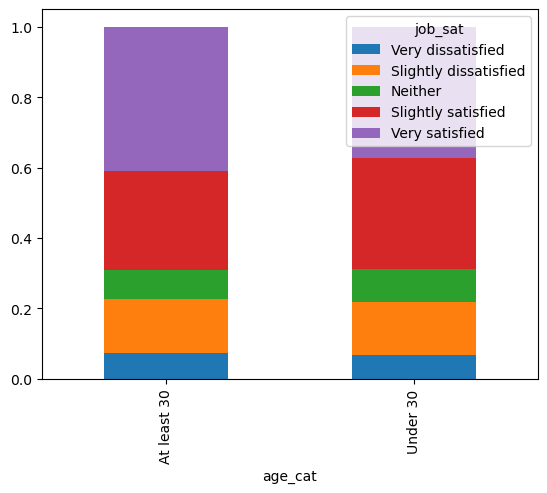

In [230]:
props = df_stck.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked=True)  
# her bir çubuk için bölümlerin benzer yerlerde olduğunu görüyoruz.

Ki-kare testini değişkenler yer değiştirmiş olarak çalıştırırsak , sonuçlar aynı olacaktır. Bu nedenle , sorularımızı "X değişkeni Y değişkeninden bağımsız mı?" yerine " X  ve Y değişkenleri bağımsız mı?" şeklinde ifade ediyoruz, çünkü sıralama önemli değil.

### Yöne ve Kuyruklar  
Bu testte kuyruklar hakkında endişelenmedik ve aslında chi2_independence yönteminin alternatif bir argümanı yoktur. Bunun nedeni ki-kare test istatistiğinin gözlenen ve beklenen sayıların karesine dayanması ve kare sayıların negatif olmamasıdır. Buda ki-kare testlerinin sağ kuyruklu testler olma eğilimnde olduğu anlamına gelir.

Sol kuyruklu ki-kare testleri istatistiksel adli tıpta bir uyumun şüpheli derecede iyi olup olmadığını tespit etmek için kullanılır çünkü veriler uydurulmuştur. Ki-kare varyans testleri iki kuyruklu olabilir. Yine de bunlar niş kullanımlardır.

# Ki-kare uyum iyiliği testleri  
Geçen sefer , iki kategorik değişkendeki oranları karşılaştırmak için ki-kare testi kullanılmıştı.Bu sefer tek bir kategorik değişkeni varsayılan bir dağılımla karşılaştırmak için ki-kare testinin başka bir çeşidi kullanılacaktır.

### Mor Bağlantılar(Purple links)  
Stack Overflow anketi ,kullanıcıların bir kodlama problemini çözmeye çalışırken mor bağlantı olarak da adlandırılan en iyi kaynağı zaten ziyaret ettiklerini keşfettiklerinde nasıl hissettiklerine dair eğlenceli bir soru içeriyor. purple_link sütunundaki her bir grubun sayılarını almak için value_counts fonksiyonu kullanılabilir. Ayrıca , daha sonra üzerinde çalışabilecek güzel yapılandırılmış bir DataFrame elde etmek için burada biraz manipülasyon yapılmaktadır. İlk olarak en soldaki sütunu purple_link olarak yeniden adlandırılır, sayılar n'ye atılır ve son olarak purple_link'e göre sıranır, böylece yanıtlar alfabetik sırada olur, purple_link sütununda saklanan dört olası yanıt vardır.

In [237]:
purple_link_counts = df_stck['purple_link'].value_counts()
purple_link_counts

purple_link
Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: count, dtype: int64

In [239]:
purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link')
purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


### Hipotezlerin Beyan Edilmesi  
Popülasyondaki kullanıcıların yarısının "Merhaba, eski dostum" yanıtını vereceğini ve diğer üç yanıtın her birinin altıda bir alacağını varsayalım. Her yanıt için anahtar-değer anahtar-değer çiftlerinden oluşan bir sözlükten bu varsayılan sonuçlar için bir DataFrame oluşturabiliriz. Hipotezleri , örneğin bu varsayılan dağılıma uyup uymadığı şeklinde belirleriz. Ki-kare test istatistiği, çözümlenen örneklem oran dağılımının hipotezlenen dağılımdan ne kadar uzak olduğunu ölçer. Anlamlılık düzeyini 0.01 olarak belirleyelim.

In [242]:
hypothesized = pd.DataFrame({
    'purple_link' : ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
    'prop' : [1/6, 1/6, 1/2, 1/6]
}
)
hypothesized

,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


H0 : Örneklem varsayılan dağılımla eşleşmektedir.  
Ha : Örneklem varsayılan dağılımla eşleşmemektedir.  
χ²: Her grupta gözlemlenen sonuçların beklentilerden ne kadar uzak olduğunu ölçer.

In [245]:
alpha=0.01

In [247]:
#  Kategoriye göre varsayılan sayılar
# Purple_link dağılımını görselleştirmek için, 
# her bir yanıt için varsayılan sayıların bulunması yardımcı olacaktır. 
# Bu sayılar, varsayılan oranların örneklemdeki 
# toplam gözlem sayısıyla çarpılmasıyla hesaplanır.
n_total = len(df_stck)
hypothesized['n'] = hypothesized['prop'] * n_total
hypothesized

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


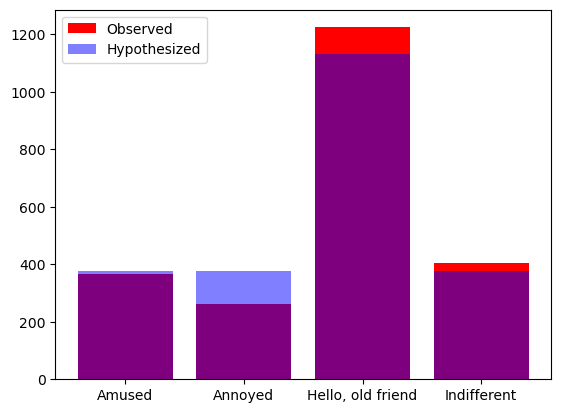

In [249]:
import matplotlib.pyplot as plt
plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5, color='blue', label='Hypothesized')
plt.legend()

Yanıtlardan ikisinin varsayılan dağılım tarafından makul ölçüde iyi modellendiğini ve diğer ikisinin oldukça farklı göründüğünü görebiliriz, ancak farkın istatiksel olarak anlamlı olup olmadığını görmek için bir hipotez testi yapmamız gerekecek.

### chi-square goodness of fit test  
Tek örneklem ki-kare testine uyum iyiliği testi denir, çünkü varsayılan verilerin gözlemlenen verilere ne kadar iyi uyduğu test edilir. Testi çalıştırmak için scipy.stats'taki chisquare yöntemi kullanılır.Chisquare yöntemi için iki gerekli argüman vardır: gözlenen sayılar için dizi benzeri bir nesne f_obs ve beklenen sayılar için bir tane f_exp fonksiyon tarafından döndürülen p-değeri çok küçüktür. 0.01 anlamlılık düzeyinden çok daha düşüktür, bu nedenle oranların örnek dağılımının varsayılan dağılımdan farklı olduğu sonucuna varırız.

In [253]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts["n"] , f_exp=hypothesized["n"])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

### Assumptions in hypothesis testing(Hipotez testinde varsayımlar)  
Şimdiye kadar görülen her hipotez testi veriler hakkında varsayımlarda bulunur. Sadece bu varsayımlar karşılandığında o hipotez testini kullanmak uygun olur.  
### Randomness(Rastgelelik)  
İster bir ister birden fazla örnek kullanılsın, her hipotez testi bir örneğin popülasyondan rastgele seçildiğini varsayar. Eğer rastgele bir örneklem yoksa , o zaman popülasyon temsil edilmeyecektir. Bu varsayımı kontrol etmek için verilerin nereden geldiğinin bilinmesi gerekir. Bunu kontrol etmek için yapılabilecek istatistiksel veya kodlama testleri yoktur. Şüpheye düşülürse, veri toplamaya dahil olan kişilere veya örneklenen popülasyonu anlayan bir alan uzmanına sorulması gerekir.  
### Independence of observations(Gözlemlerin Bağımsızlığı)  
Testler ayrıca her bir gözlemin bağımsız olduğunu varsayar. İki örnek arasındaki bağımlılıklara izin verilen eşleştirilmiş t-testleri gibi bazı özel durumlar vardır, ancak bunlar hesaplamaları değiştirir, bu nedenle bu tür bağımlılıkların nerede meydana geldiğinin anlaşılması gerekir. Eşleştirilmiş t-testinde görüldüğü gibi , bağımlılıkların hesaba katılmaması yanlış negatif ve yanlış pozitif hata olasılığının artmasına neden olur.Bağımlılıkların hesaba katılmaması , analiz sırasında teşhis edilmesi zor bir sorundur. İdeal olarak, veriler analiz edilmeden önce tartışılması gerekir.

### Large Sample Size(Büyük Örneklem Büyüklüğü)  
Hipotez testleri ayrıca örneklemin Merkez Limit Teoremi'nin geçerli olacağı kadar büyük olduğunu ve örneklem dağılımının normal dağıldığı varsayılabilir. Daha küçük örneklemler daha büyük belirsizliğe neden olur , bu da Merkezi Limit Teoremi'nin geçerli olmadığı ve örneklem dağılımının normal dağılmayabileceği anlamına gelebilir. Küçük bir örneklemin artan belirsizliği, tahmin etmeye çalışılan parametre üzerinde daha geniş güven aralıkları elde edileceği anlamına gelir. Merkezi Limit Teoremi geçerli değilse , örneklem üzerinde yapılan hesaplamalar ve bunlardan çıkarılan sonuçlar saçma olabilir, bu da yanlış negatif ve yanlış pozitif hata olasılığını artırır. Örneklemin "yeterince büyük" olması için ne kadar büyük olması gerektiği teste bağlıdır.

# 11.HAFTA

In [262]:
import pandas as pd
df_small =pd.read_feather("data/repub_votes_potus_08_12.feather")
df_small

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757
...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478
96,Wisconsin,La Crosse,37.490904,40.577038
97,Wisconsin,Lafayette,38.104967,41.675050
98,Wyoming,Weston,76.684241,83.983328


In [264]:
df_small['diff'] = df_small['repub_percent_08'] - df_small['repub_percent_12']
df_small

,state,county,repub_percent_08,repub_percent_12,diff
0,Alabama,Hale,38.957877,37.139882,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
2,California,Lake,38.896719,39.331367,-0.434648
3,California,Ventura,42.923190,45.250693,-2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812
...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087


In [266]:
df_small['abs_diff'] = df_small['diff'].abs()
df_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff
0,Alabama,Hale,38.957877,37.139882,1.817995,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179,2.257179
2,California,Lake,38.896719,39.331367,-0.434648,0.434648
3,California,Ventura,42.923190,45.250693,-2.327503,2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812,0.757812
...,...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937,4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134,3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083,3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087,7.299087


In [268]:
from scipy.stats import rankdata

df_small['rank_abs_diff'] = rankdata(df_small['abs_diff'])
df_small

#df_small: Bu, üzerinde işlem yapılan pandas DataFrame'idir. DataFrame, verilerin tabular bir şekilde tutulduğu yapıdır.
#df_small['abs_diff']: Bu, DataFrame'deki abs_diff sütununu temsil eder. Bu sütundaki değerler, genellikle bir tür mutlak fark olabilir (örneğin, iki sayı arasındaki farkların mutlak değerleri).
#rankdata(df_small['abs_diff']): Bu fonksiyon, abs_diff sütunundaki her değeri sıralar ve her değere sırasıyla bir rütbe atar. Eşit değerler için ortanca rütbe atanır.
#df_small['rank_abs_diff']: Bu, df_small DataFrame'ine yeni bir sütun ekler. Bu sütun, her bir mutlak farkın rütbesini içerir.

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
0,Alabama,Hale,38.957877,37.139882,1.817995,1.817995,33.0
1,Arkansas,Nevada,56.726272,58.983452,-2.257179,2.257179,42.0
2,California,Lake,38.896719,39.331367,-0.434648,0.434648,10.0
3,California,Ventura,42.923190,45.250693,-2.327503,2.327503,44.0
4,Colorado,Lincoln,74.522569,73.764757,0.757812,0.757812,16.0
...,...,...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937,4.094937,63.0
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134,3.086134,50.0
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083,3.570083,54.0
98,Wyoming,Weston,76.684241,83.983328,-7.299087,7.299087,87.0


In [270]:
T_minus = 1 + 4 + 5 + 2 + 3
T_plus = 0
W = np.min([T_minus, T_plus])
W

0

### Implementation with pingouin.wilcoxon()  
pingouin'in wilcoxon yöntemi, eşleştirilmiş bir argümana sahip olmaması dışında ttest yöntemine çok benzer argümanlar alır. Fonksiyon sıfır W değeri döndürür- bizim manuel hesaplamamızla aynı. Bu t-testinden elde edilen p-değerinden on kat daha büyük olan yaklaşık yüzde üçlük bir p-değerine karşılık gelir, bu nedenle küçük örnek boyutu göz önüne alındığında bu sonuçtan daha emin olmalıyız. Wilcoxon testi, beş satırlık bu küçük örneklemi kullanarak 2008 Cumhuriyetçi yüzdelerinin 2012 yüzdelerinden daha küçük olduğuna dair kanıtımız olmadığını göstermektedir.

In [273]:
alpha = 0.01
pingouin.wilcoxon(x=df_small['repub_percent_08'], 
                  y=df_small['repub_percent_12'], 
                  alternative='less')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,386.0,less,9.700674e-14,-0.847129,0.5729


# Non-parametric ANOVA and unpaired t-test  
### Wilcoxon-Mann-Whitney test  
Sayısal bir girdinin sıralamaları üzerinde hipotez testleri gerçekleştirerek normal dağılımlı verilerle ilgili varsayımlardan kaçınılabilir. Wilcoxon-Mann-Whitney testi , çok kabaca ,sıralanmış veriler üzerinde bir t-testidir. Bu test, bir önceki derste görülen Wilcoxon testine benzer, ancak bunun yerine eşleştirilmemiş veriler üzerinde çalışır.  
StackOverflow anketine ve dönüştürülen ücret ile katılımcıların kodlamaya başlama yaşı arasındaki ilişkiye geri dönelim. age_vs_comp adlı yeni bir DataFrame'de sadece bu iki sütuna odaklanarak başlıyoruz. Pingouin ile Wilcoxon-Mann-Whitney testi yapmak için öncelikle verilerimizi uzun formattan geniş formata dönüştürmemiz gerekir. Bu, pandas'ın pivot_table'dan farklı olarak toplama yapmayan pivot yöntemi ile gerçekleştirilir; bunun yerine , satırlar boyunca her grup için ham değerleri döndürür. Artık verilerimiz, her satır için converted_comp girdilerine karşılık gelen değerlerle birlikte adult ve child adlı iki sütunda bulunmaktadır. NaN yetişkin değeri bir çocuk girişine ve NaN çocuk değeri de bir yetişkin girişine karşılık gelir.

In [276]:
import pandas as pd

df_stck= pd.read_feather("data/stack_overflow.feather")

In [278]:
age_vs_comp = df_stck[['converted_comp', 'age_first_code_cut']]
age_vs_comp

,converted_comp,age_first_code_cut
0,77556.0,adult
1,74970.0,child
2,594539.0,child
3,2000000.0,adult
4,37816.0,adult
...,...,...
2256,145000.0,child
2257,33972.0,child
2258,97284.0,child
2259,72000.0,child


In [280]:
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', 
                                     values='converted_comp')
age_vs_comp_wide

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN
...,...,...
2256,NaN,145000.0
2257,NaN,33972.0
2258,NaN,97284.0
2259,NaN,72000.0


### Wilcoxoo-Mann-Whitney test  
Anlamlılık düzeyi 0.01 olarak belirlensin. pingouin'den mwu kullanarak bir Wilcoxon-Mann-Whitney testi çalıştırılabilir. Karşılaştırak istenilen iki sayı sütununa karşılık gelen x ve y argümanlarını kabul eder, bu durumda çocuk ve yetişkin . alternative , alternatif hipotezin türünü belirler, bu durumda, önce çocuk olarak kodlayanların önce yetişkin olarak kodlayanlardan daha yüksek bir gelire sahip olduğu , ki bu sağ kuyruklu bir testtir. Burada , p-değeri yaklaşık on üzeri negatif on dokuzuncu kuvvet olarak gösterilmektedir, bu da anlamlılık düzeyinden önemli ölçüde daha küçüktür.

In [284]:
import pingouin

alpha = 0.01

pingouin.mwu(x=age_vs_comp_wide['child'], 
             y=age_vs_comp_wide['adult'], 
             alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,0.222516,0.611258


### Kruskal-Wallis test  
ANOVA'nın t-testlerini ikiden fazla gruba genişletmesi gibi, Kruskal-Wallis testi de Wilcoxon-Mann-Whitney testini ikiden fazla gruba genişletir. Yani , Kruskal-Wallis testi ANOVA'nın parametrik olmayan bir versiyonudur. İş tatmini grupları arasında converted_comp açısından bir fark olup olmadığını araştırmak üzere Kruskal-Wallis testi yapmak için pingouin'in kruskal yöntemini kullanıyoruz. Wilcoxon-Mann-Whitney testinin aksine, kruskal yöntemi uzun veriler üzerinde çalıştığı için burada verilerimizi pivotlamamıza gerek yoktur. Veri olarak stack_overflow, bağımlı değişken olan dv'yi converted_comp olarak giriyoruz ve job_sat grupları arasında karşılaştırma yapıyoruz. Yine, burada ki p-değeri çok küçüktür ve anlamlılık düzeyimizden daha küçüktür. Bu, ortalama tazminat toplamlarından en az birinin bu beş iş memnuniyeti grubunda diğerlerinden farklı olduğuna dair kanıt sağlamaktadır.

In [287]:
alpha = 0.01

pingouin.kruskal(data=df_stck, dv='converted_comp', between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15
